<a href="https://colab.research.google.com/github/RestianaA/Trash-Segmentation/blob/main/Train_YOLOv11_using_WasteIn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!nvidia-smi

Sun Jun 15 12:20:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install ultralytics
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# If using Dataset from GOOGLE DRIVE
# Grant Access to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# If using Dataset from ROBOFLOW

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wS05oii7vyVXHOBDRUQs")
project = rf.workspace("ai-projects-r9oea").project("waste-in-instance-segmentation")
version = project.version(2)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 112.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Waste-In-Instance-Segmentation-2 in yolov11:: 100%|██████████| 3666/3666 [00:00<00:00, 7465.35it/s]


In [ ]:
# Ifusing Dataset from ROBOFLOW

dataset.location

'/content/Waste-In-Instance-Segmentation-2'

In [ ]:
# SEGMENTATION - Dataset from GOOGLE DRIVE

# Load the YOLO11n-Seg Model
model = YOLO("yolo11n-seg.pt")

results = model.train(task='segment', mode = 'train', data = "/content/drive/MyDrive/wasteai_by_rickyindrag/data.yaml", epochs = 50)

In [ ]:
# SEGMENTATION - Dataset from ROBOFLOW

# Load the YOLO11n-Seg Model
model = YOLO("yolo11n-seg.pt")

results = model.train(task='segment', mode = 'train', data = "/content/Waste-In-Instance-Segmentation-2/data.yaml", epochs = 50)

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Waste-In-Instance-Segmentation-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

train: Scanning /content/Waste-In-Instance-Segmentation-2/train/labels... 1467 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1467/1467 [00:01<00:00, 1452.85it/s]


train: New cache created: /content/Waste-In-Instance-Segmentation-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.5±4.3 MB/s, size: 10.9 KB)


val: Scanning /content/Waste-In-Instance-Segmentation-2/valid/labels... 180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 180/180 [00:00<00:00, 530.08it/s]

val: New cache created: /content/Waste-In-Instance-Segmentation-2/valid/labels.cache


Plotting labels to runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


AttributeError: module 'sympy' has no attribute 'printing'

In [ ]:
# DETECTION - Dataset from GOOGLE DRIVE

# Load the YOLO11n Model
model = YOLO("yolo11n.pt")

results = model.train(task='detect', mode = 'train', data = "/content/drive/MyDrive/wasteai_by_rickyindrag/data.yaml", epochs = 50)

In [ ]:
# DETECTION - Dataset from ROBOFLOW

# Load the YOLO11n Model
model = YOLO("yolo11n.pt")

results = model.train(task='detect', mode = 'train', data = "/content/WasteIn-Dataset-7/data.yaml", epochs = 50)

In [ ]:
import shutil

shutil.make_archive('WasteIn-Dataset-7-NoPaper', 'zip', 'runs/detect/train3/')

'/content/WasteIn-Dataset-7-NoPaper.zip'

In [ ]:
from google.colab import files
files.download("WasteIn-Dataset-7-NoPaper.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_path = "/content/runs/detect/train3"

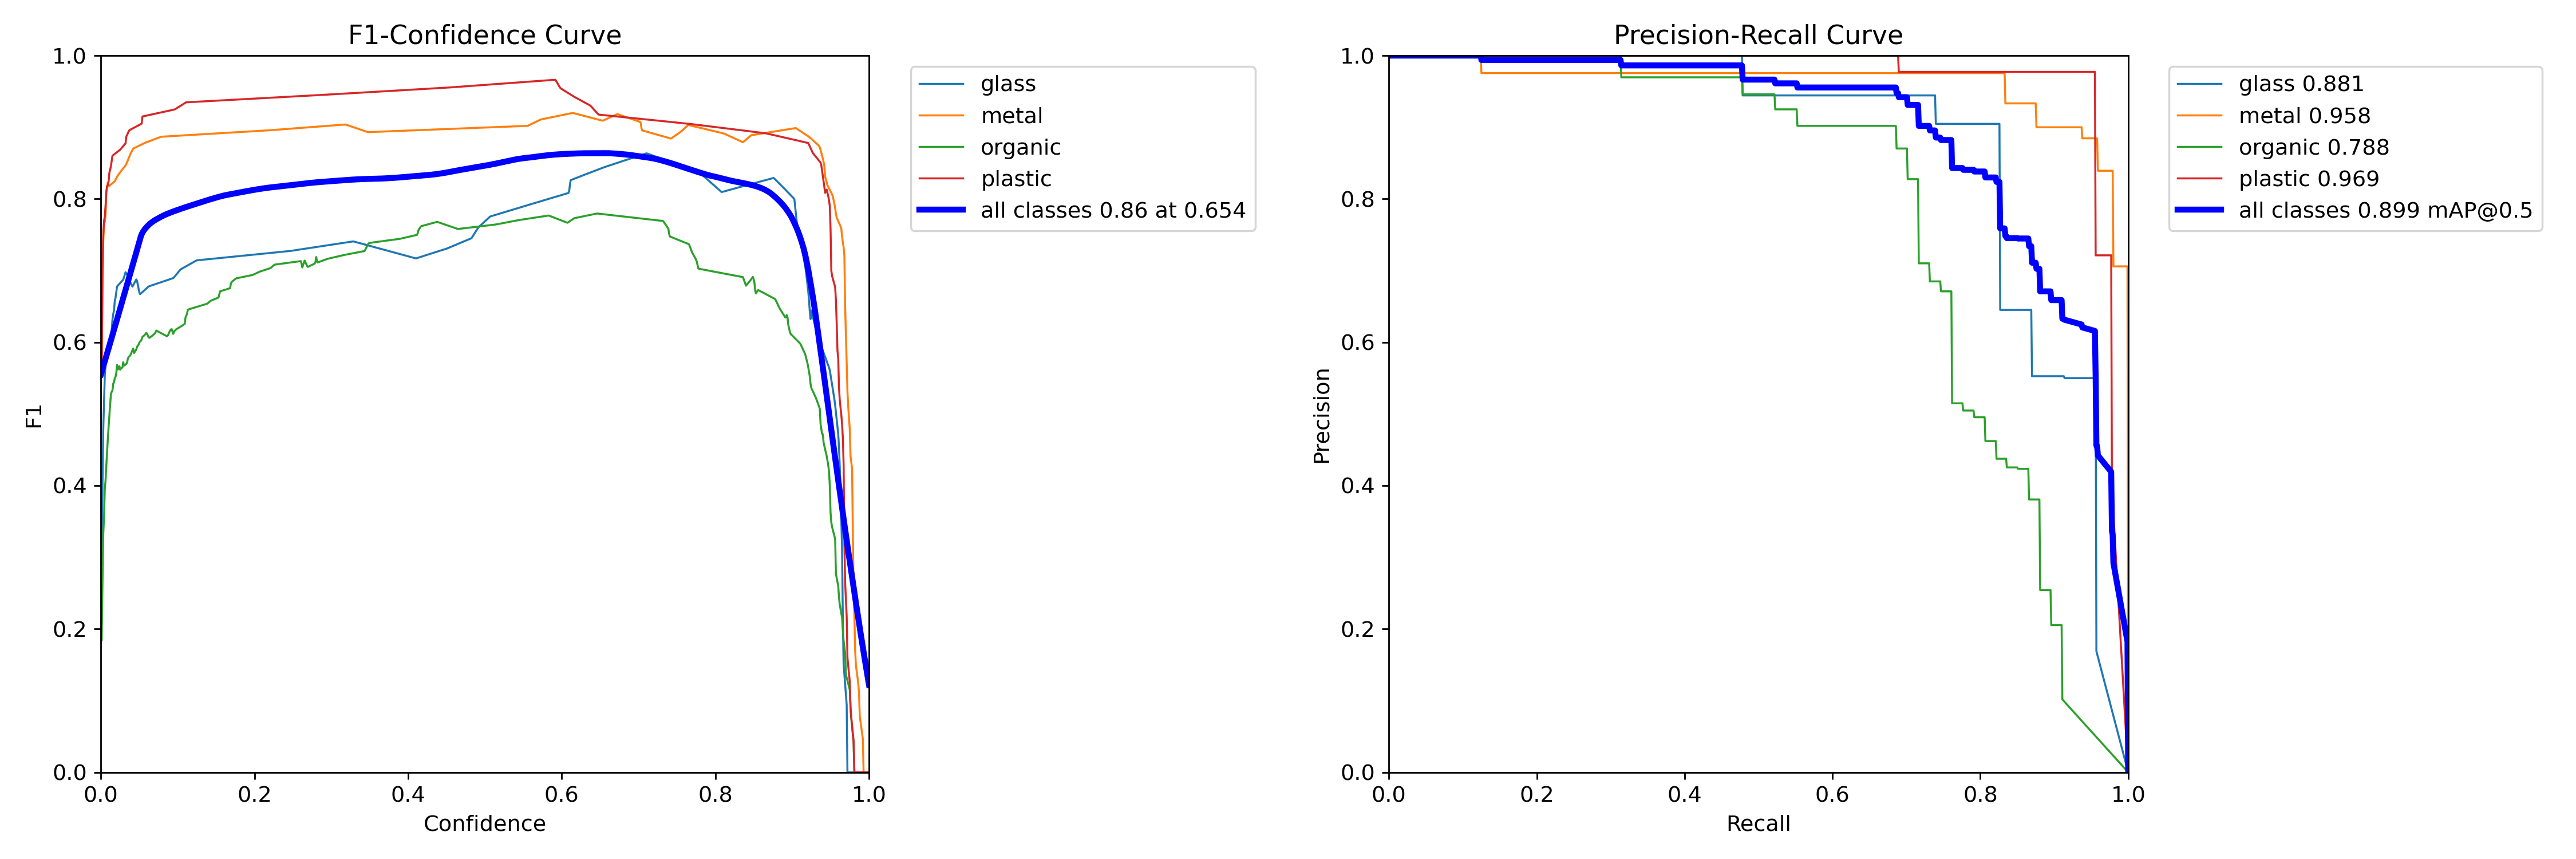

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Load your images using OpenCV
img1 = cv2.imread(f"{train_path}/F1_curve.png")
img2 = cv2.imread(f"{train_path}/PR_curve.png")

#Concatenate the images horizontally
top_row = cv2.hconcat([img1, img2])

#Display the concatenated images
cv2_imshow(top_row)

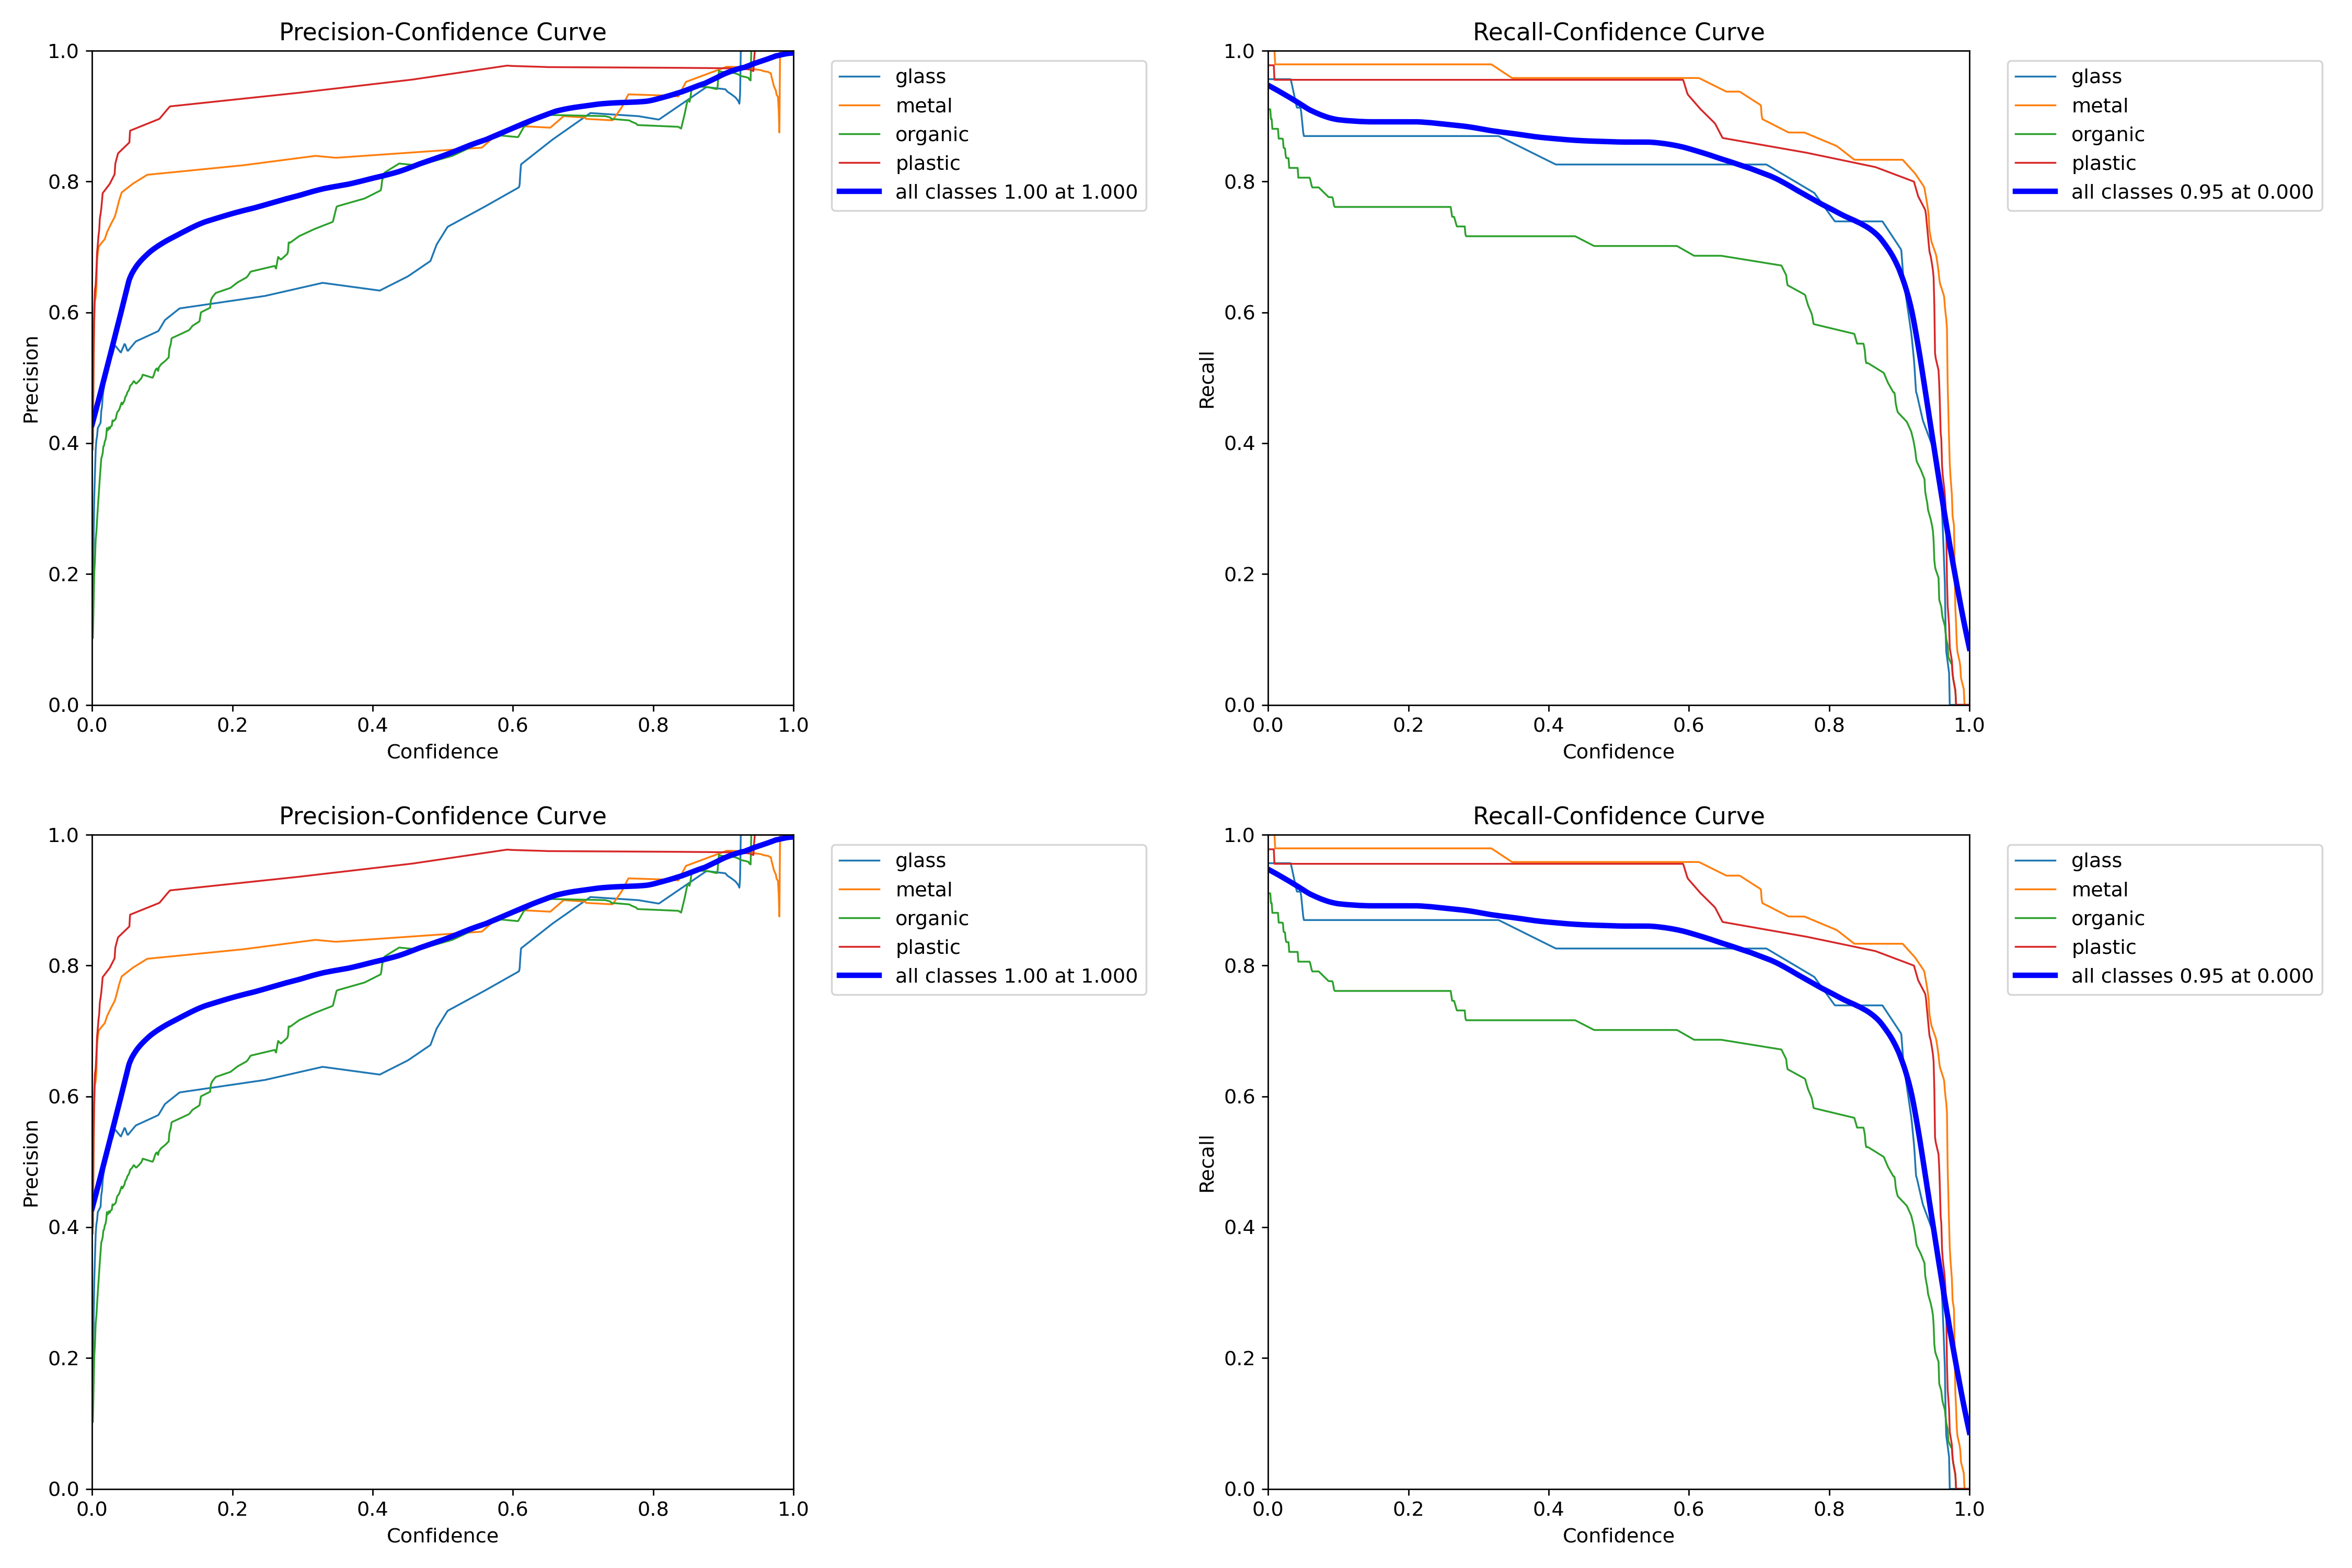

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Load your images using OpenCV
img1 = cv2.imread(f"{train_path}/P_curve.png")
img2 = cv2.imread(f"{train_path}/R_curve.png")
img3 = cv2.imread(f"{train_path}/P_curve.png")
img4 = cv2.imread(f"{train_path}/R_curve.png")

#Concatenate the images horizontally
top_row = cv2.hconcat([img1, img2])
botton_row = cv2.hconcat([img3, img4])

#Concatenate the two rows vertically
grid = cv2.vconcat([top_row, botton_row])
#Display the concatenated images
cv2_imshow(grid)


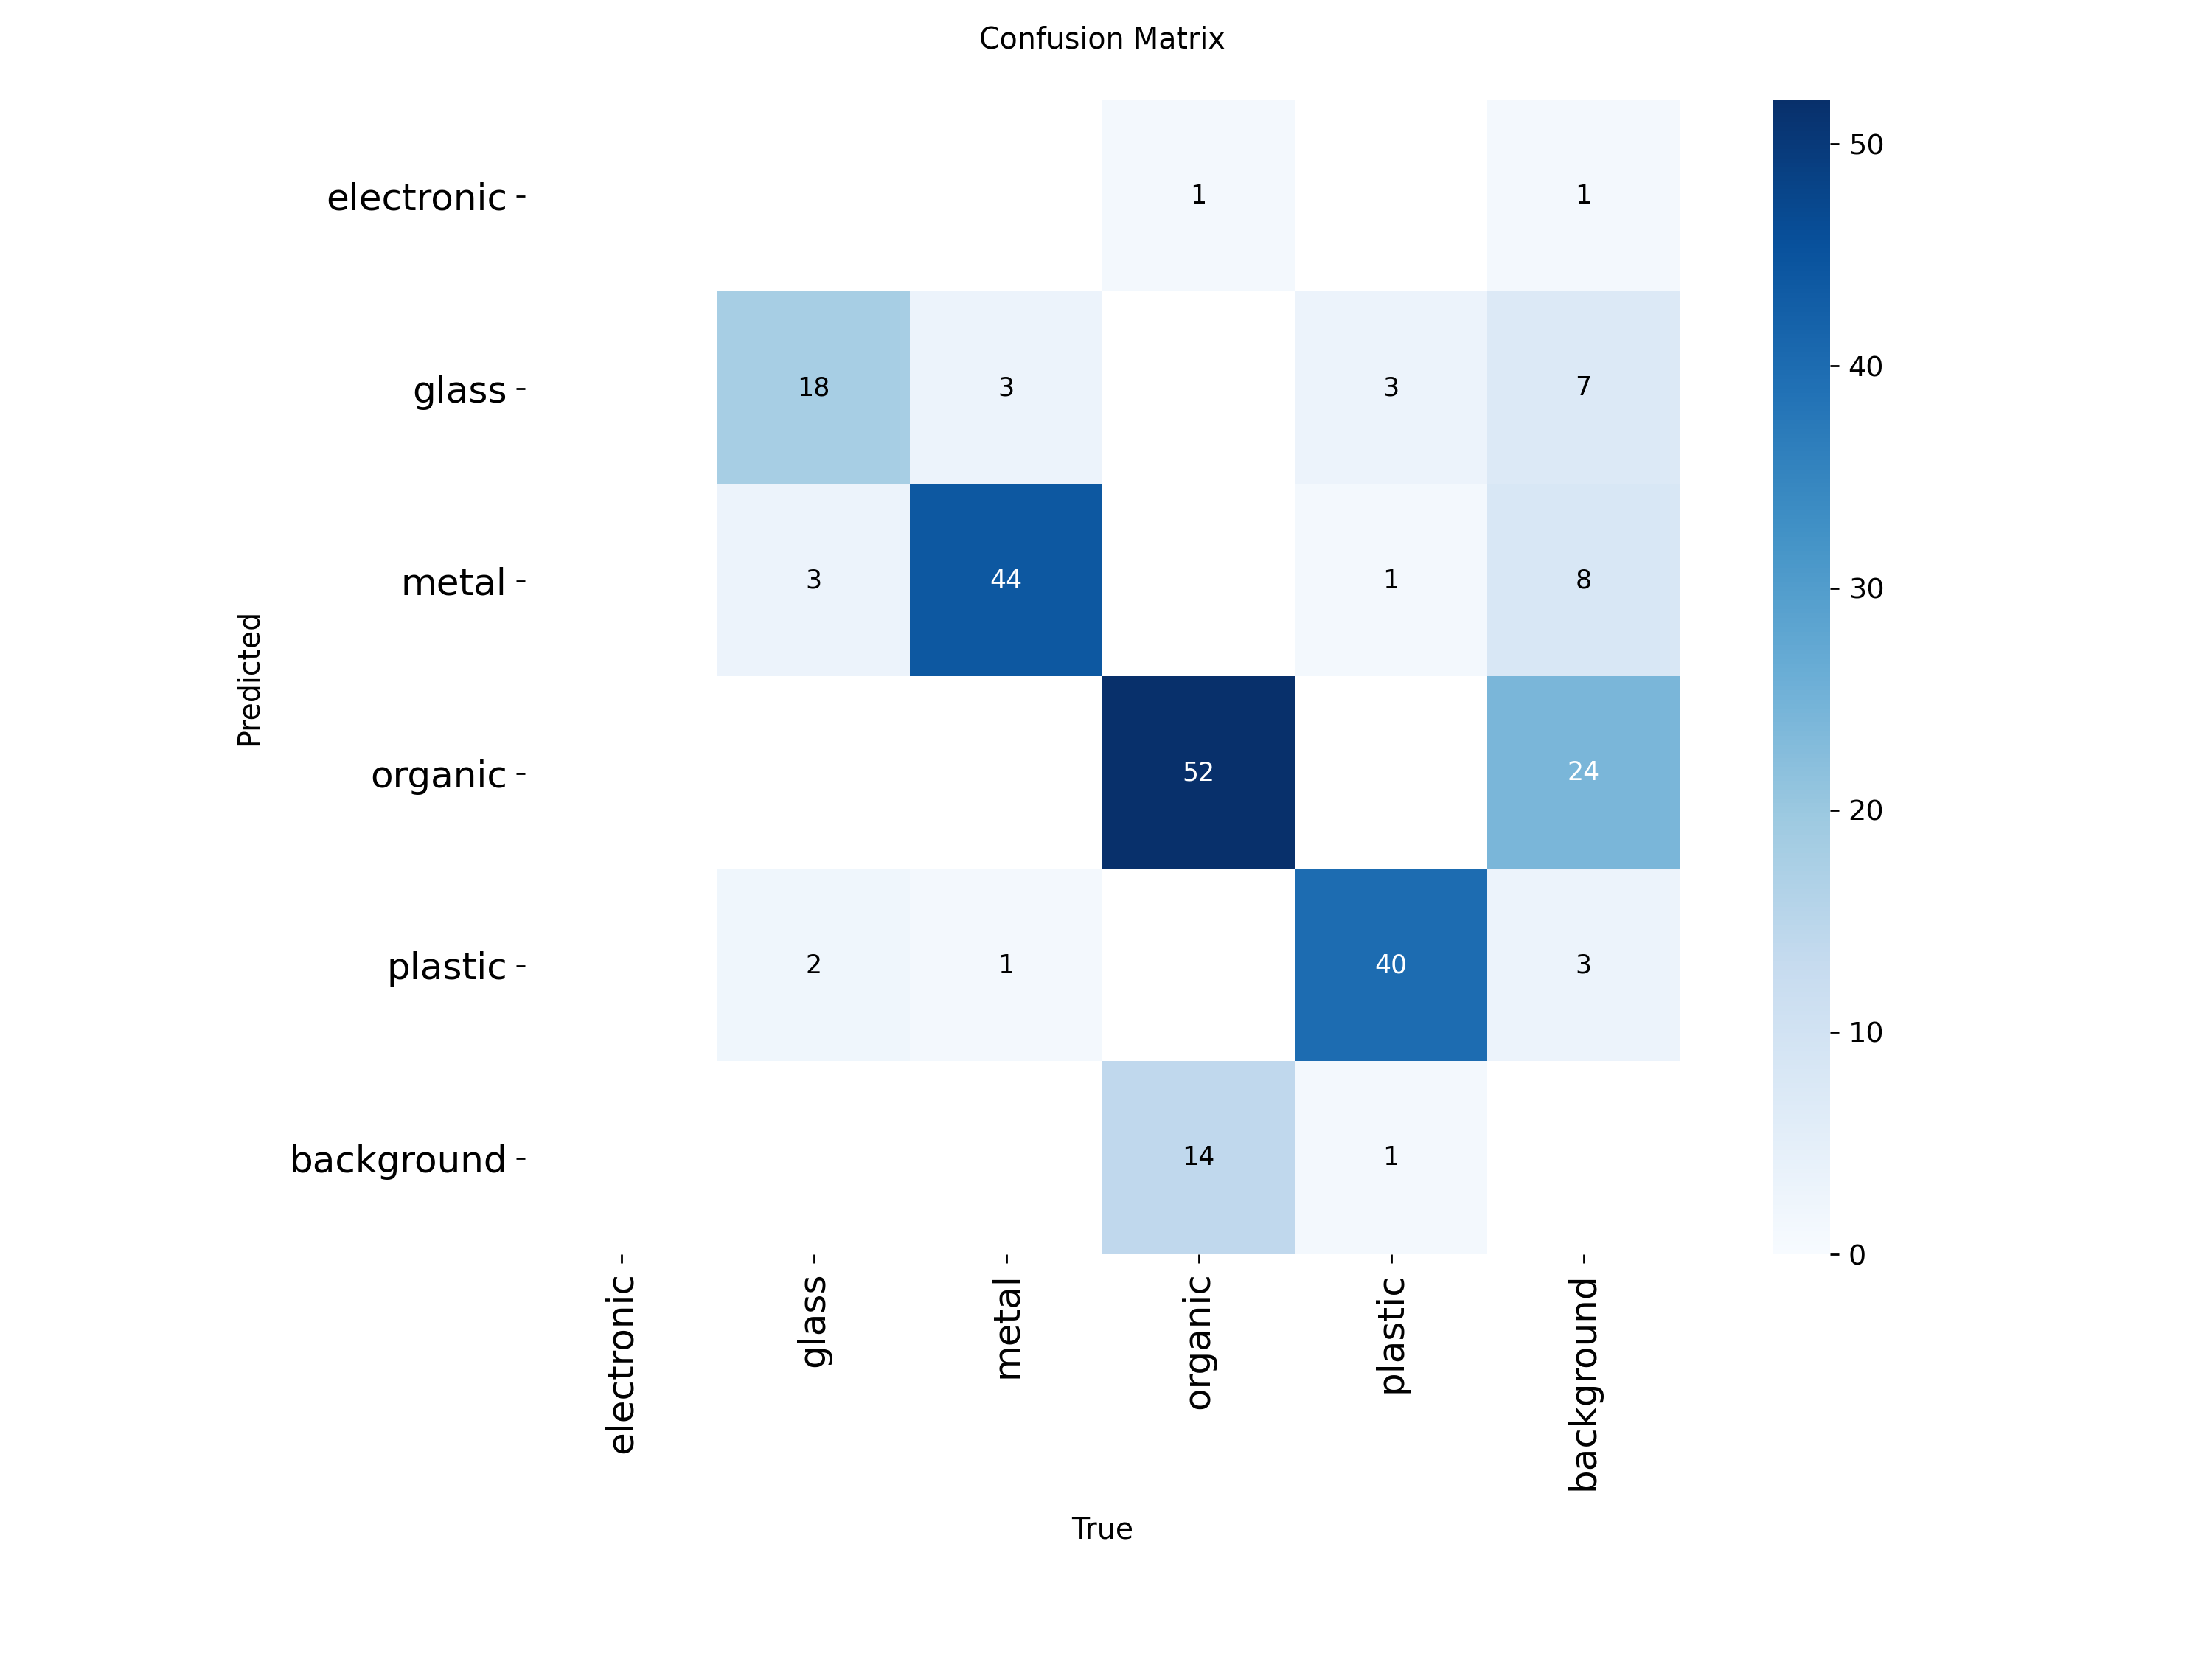

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix.png", width = 800)

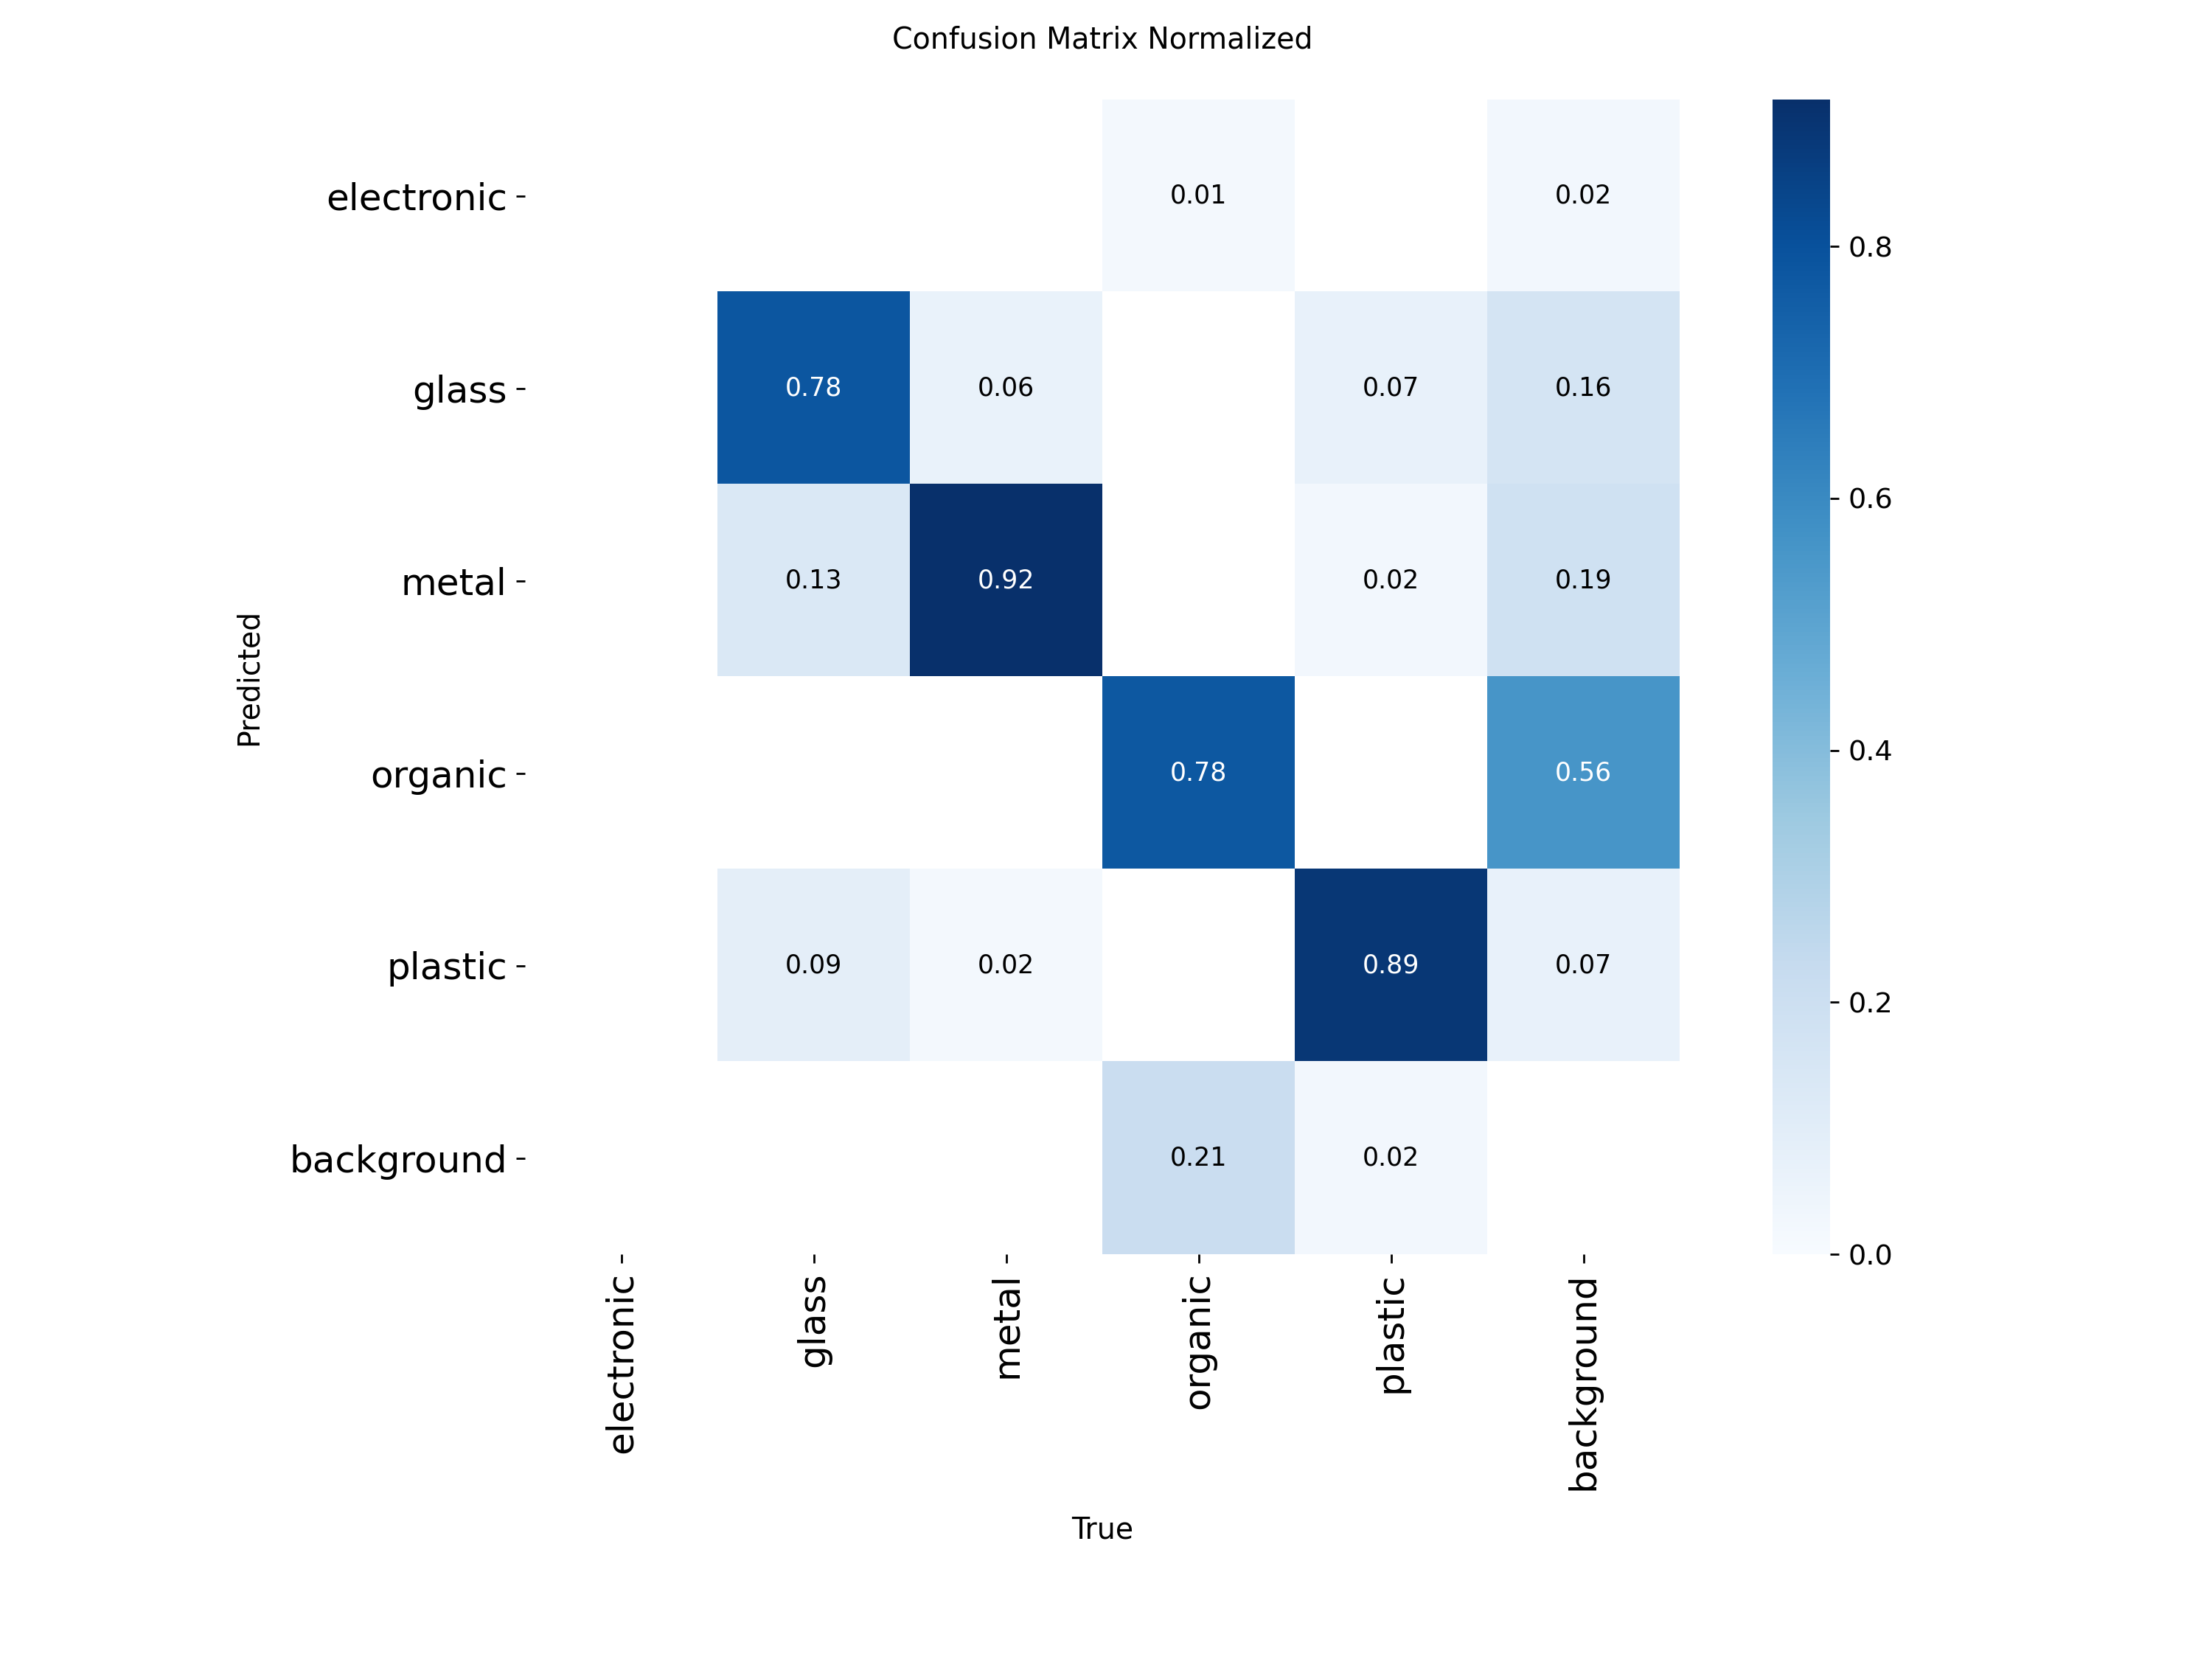

In [ ]:
Image("/content/runs/detect/train3/confusion_matrix_normalized.png", width = 800)

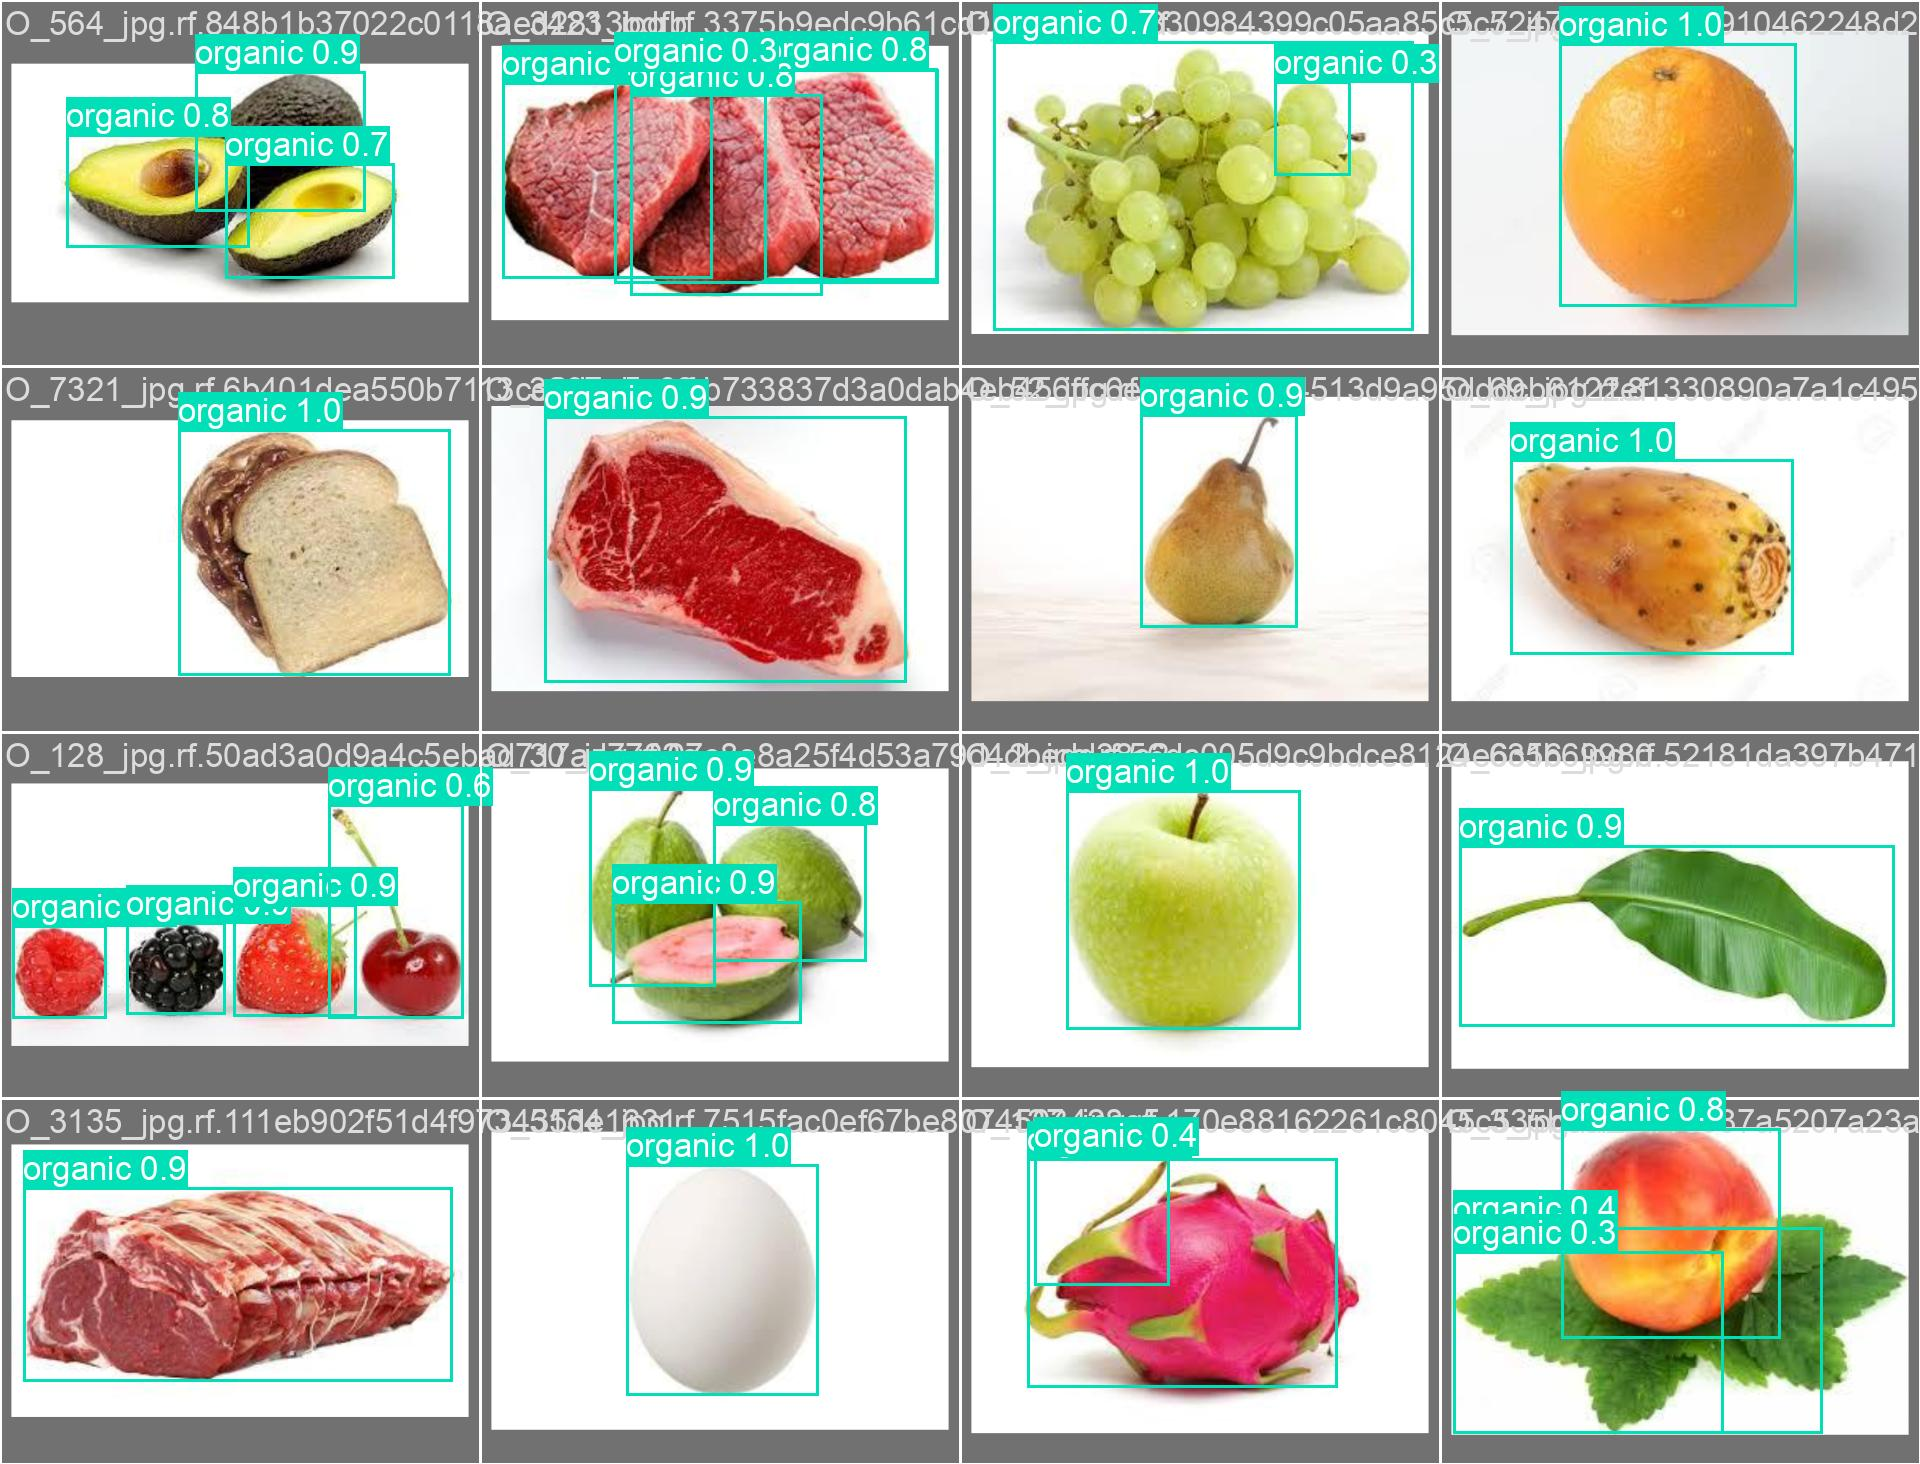

In [ ]:
Image("/content/runs/detect/train3/val_batch0_pred.jpg", width = 800)

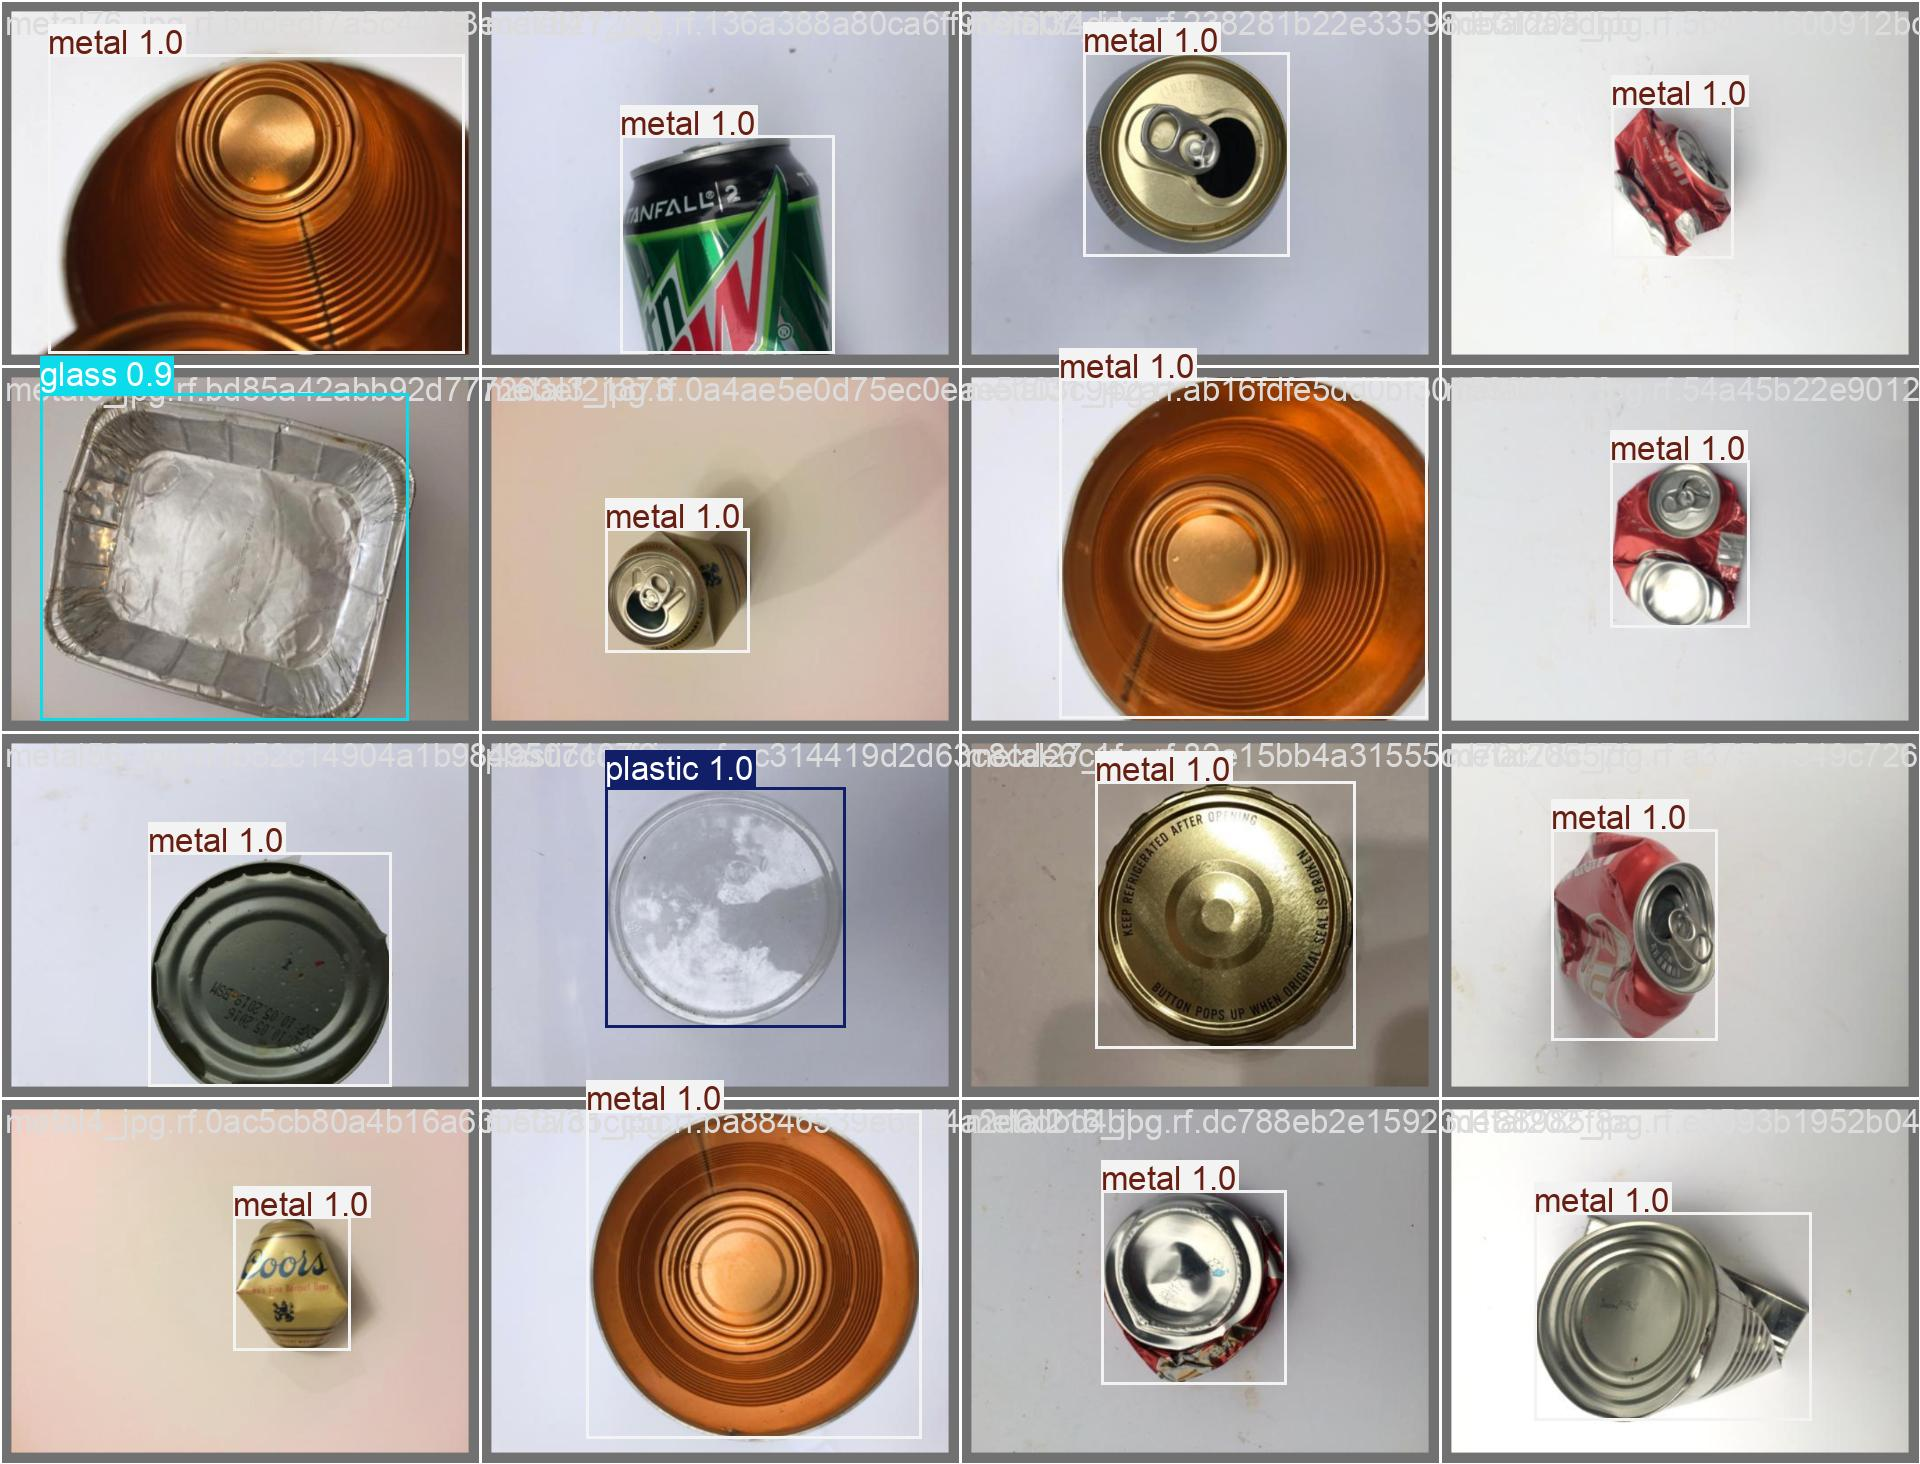

In [ ]:
Image("/content/runs/detect/train3/val_batch1_pred.jpg", width = 800)

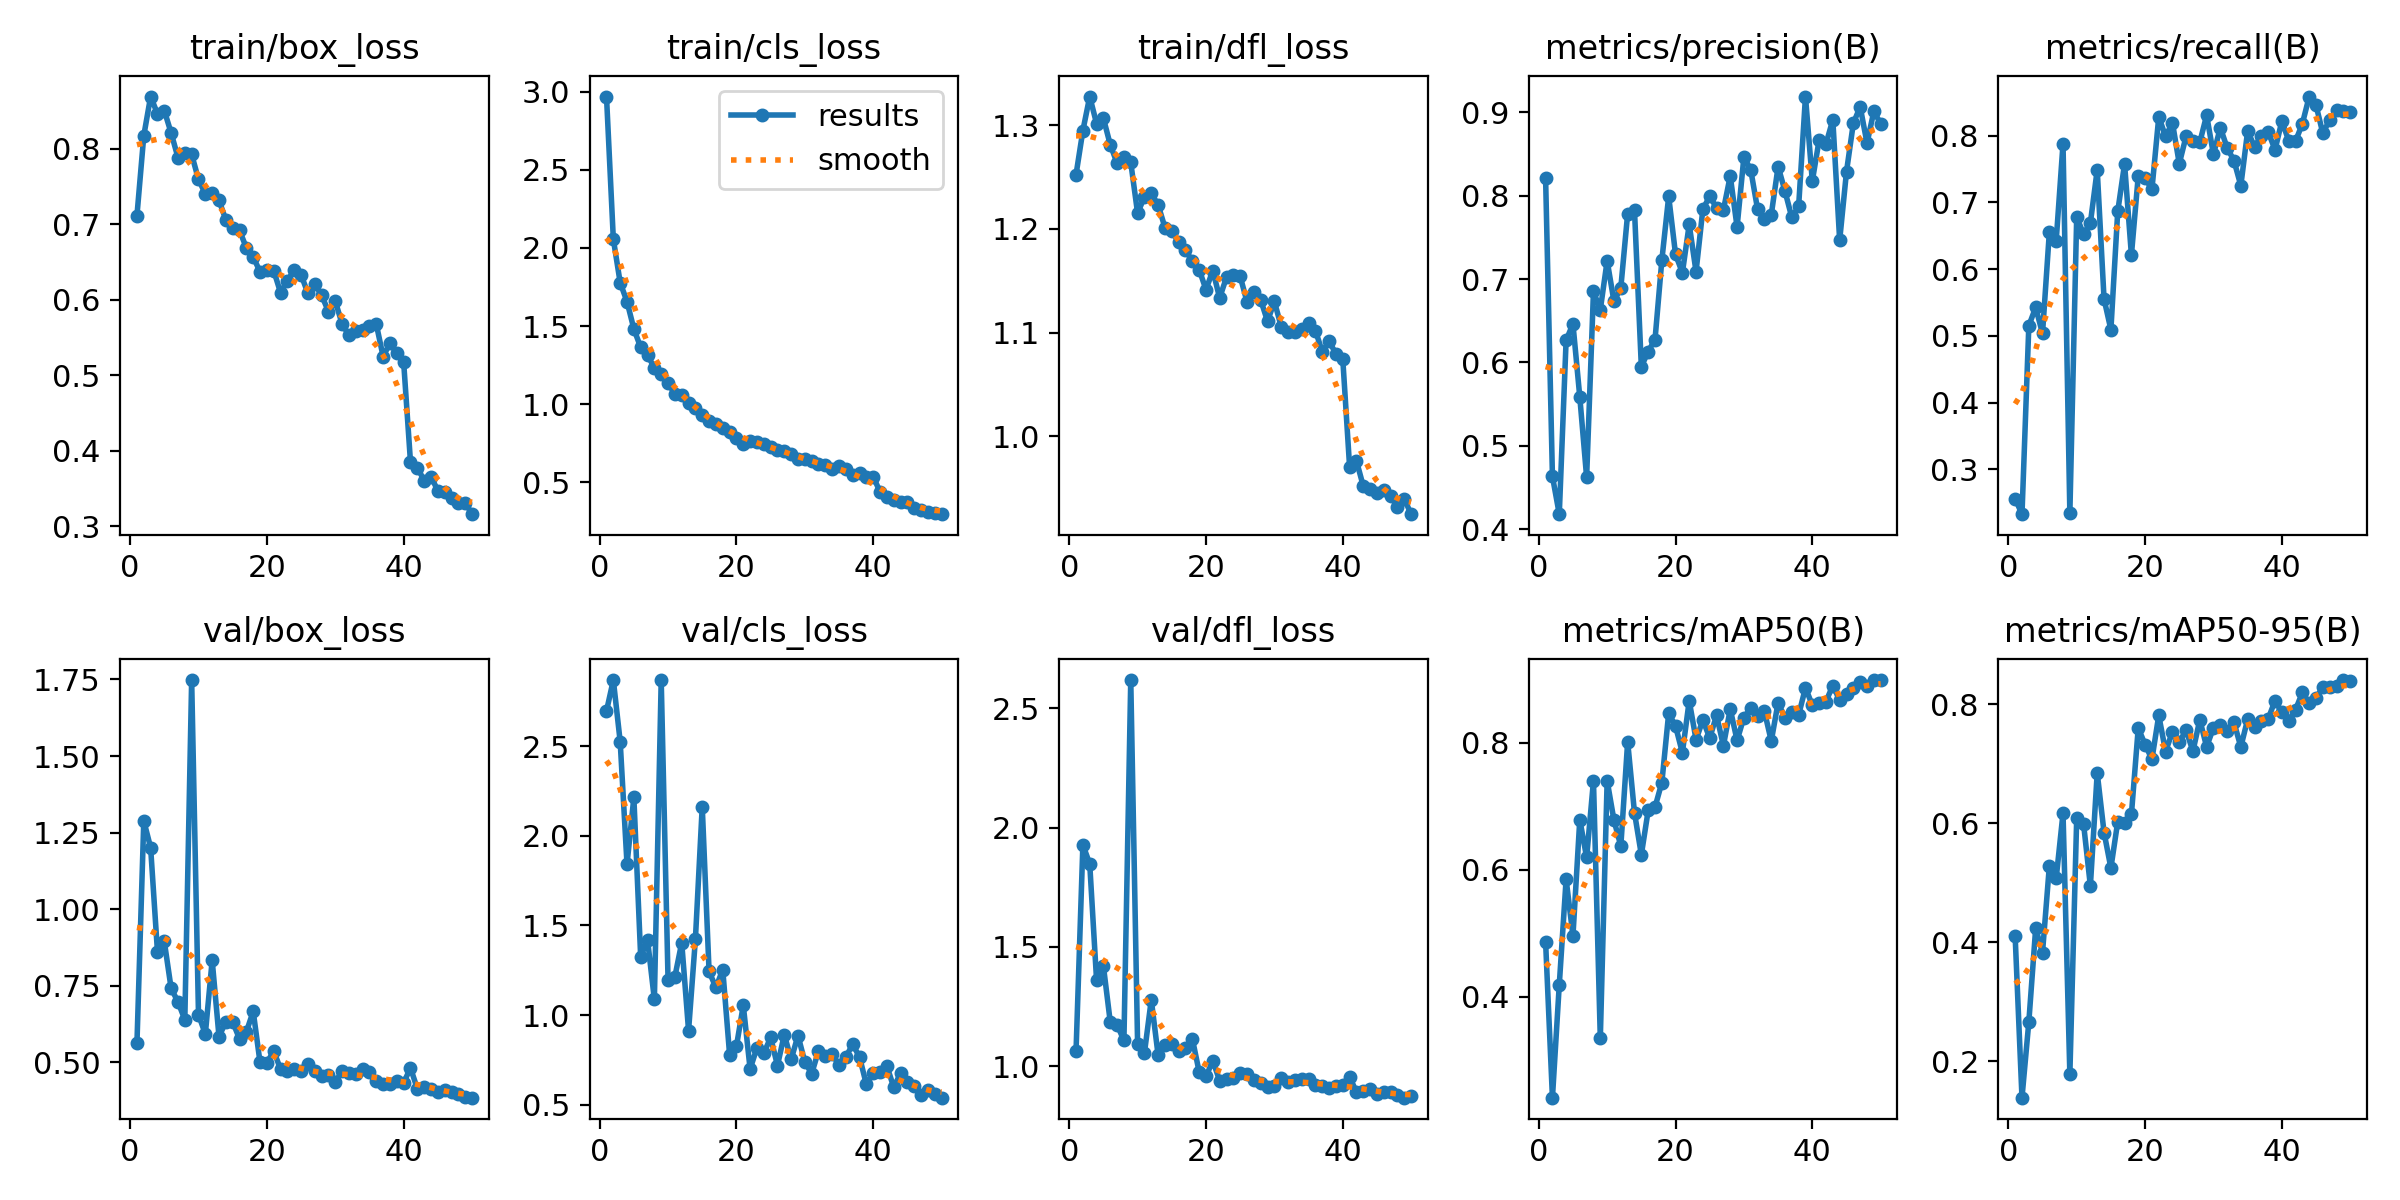

In [ ]:
Image("/content/runs/detect/train3/results.png", width = 800)

In [ ]:
#COBA PAKAI GAMBAR

In [ ]:
#PAKAI VIDEO